# Segundo Trabalho de Reconhecimento de Padrões

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Considerando duas classes equiprováveis:

C1 -> gaussiana bidimensional com média [0 0] e matriz de covariância [1 0; 0 1]

C2 -> gaussiana bidimensional com média [6 6] e matriz de covariância [1 0; 0 1]

Separe o conjunto de dados de treino e teste, com 500 eventos de cada classe em cada conjunto.

**Solução:**

In [2]:
#Matrizes das médias de cada classe:
m1 = [0,0]   
m2 = [6,6] 

#Matrizes de covariância de cada classe:
s1 = [[1,0],[0,1]]               
s2 = [[1,0],[0,1]]  

#Geração das classes:
c1 = np.random.multivariate_normal(m1, s1, 1000)    #Função para gerar eventos da classe 1.
c2 = np.random.multivariate_normal(m2, s2, 1000)    #Função para gerar eventos da classe 2.

#Label de cada classe: (classe 1 = 0 e classe 2 = 1)
yc1 = np.zeros(len(c1))   
yc2 = np.ones(len(c2))   

#Separação dos conjuntos de treino e teste:
c1_xTrain, c1_xTest, c1_yTrain, c1_yTest = train_test_split(c1, yc1, train_size = 0.5, random_state = 0) 
c2_xTrain, c2_xTest, c2_yTrain, c2_yTest = train_test_split(c2, yc2, train_size = 0.5, random_state = 0)

## Questão 1

Obtenha a função discriminante de Bayes e plote a superfície de separação juntamente com 500 eventos de cada classe do conjunto de teste.

**Solução:**

Como feito no trabalho 1 de reconhecimento de padões, a função discriminante de Bayes foi calculada de forma que:

$$P(x/\omega_{1}) - P(x/\omega_{2}) = 0$$

sendo,

$$P(x/\omega_{i}) = \frac{1}{(2\pi)^{\frac{l}{2}\left | \sum _ {i} \right |^{\frac{1}{2}}}}exp\left ( -\frac{1}{2}(x - \mu )^{T} \sum{_{i}^{-1}} (x - \mu )\right )$$

onde $x$ é o vetor formado por $[x_{1} x_{2}]$ e $\mu$ é a matriz de covariância de dimensão $l$x$l$ das classes.

Substituindo os valores dados no enunciado, obtém-se:

$$x_{1}^{2} + x_{2}^{2} -(x_{1} - 6)^{2} - (x_{2} - 6)^{2} = 0$$

Logo, a função discriminante de Bayes é:

$$-12x_{1} - 12x_{2} + 72 = 0$$

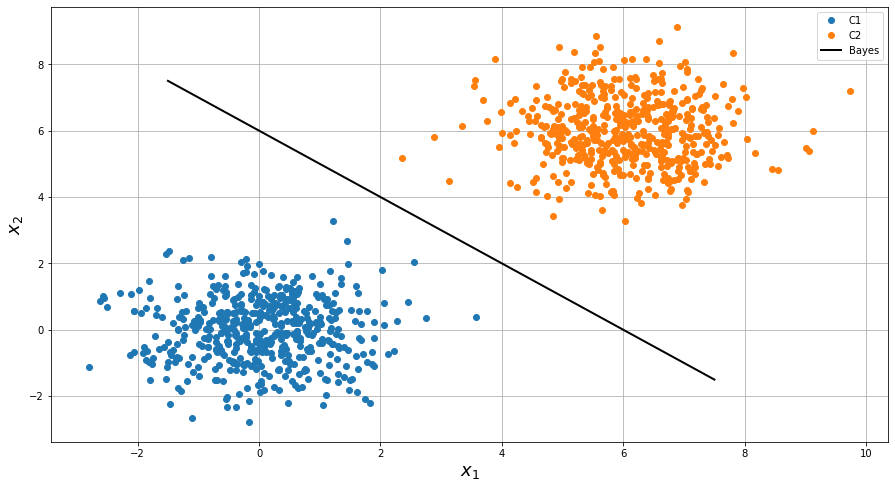

In [3]:
#Função discriminante baseada na regra de Bayes:
x1 = np.linspace(-1.5,7.5,100)    
x2 = -x1 + 6          

#Plot do conjunto de teste de cada classe e da superfície de separação:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2, 'k',linewidth=2)
plt.legend(['C1','C2','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

## Questão 2

Projete o classificador perceptron utilizando o algoritmo visto nos slides, utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [-1.         -0.6497377   3.64213176]


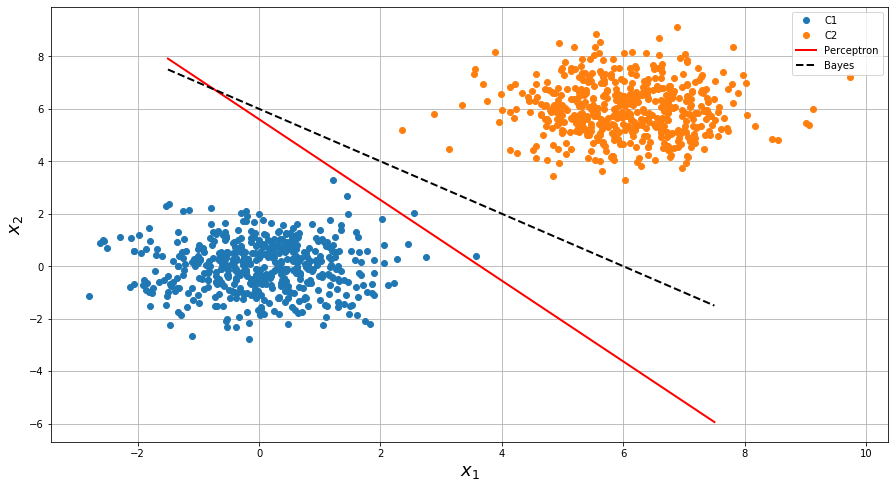

In [4]:
#Implementação do classificador perceptron:
def perceptron(c1_tr, c2_tr, w, rho):
    e1 = (w[0]*c1_tr[:,0]+w[1]*c1_tr[:,1]+ w[2] > 0)    #Amostras classificadas erroneamente da classe 1 
    e2 = (w[0]*c2_tr[:,0]+w[1]*c2_tr[:,1]+ w[2] < 0)    #Amostras classificadas erroneamente da classe 2
    while (np.sum(e1) + np.sum(e2) != 0):               #Loop tendo o erro igual a zero como critério de parada
        ex1 = np.insert(c1_tr[e1,:],2,1, axis = 1)          #Adicionando coluna de 1's 
        ex2 = np.insert(c2_tr[e2,:],2,1, axis = 1)          #Adicionando coluna de 1's
        w  = w - sum(rho*ex1) + sum(rho*ex2)                #Atualização dos pesos
        e1 = (w[0]*c1_tr[:,0]+w[1]*c1_tr[:,1]+ w[2] > 0)    #Amostras classificadas erroneamente da classe 1 
        e2 = (w[0]*c2_tr[:,0]+w[1]*c2_tr[:,1]+ w[2] < 0)    #Amostras classificadas erroneamente da classe 2
    return w


w_i = np.array([0.3, 0.3, 0.3])
rho = 0.1

w = perceptron(c1_xTrain, c2_xTrain, w_i, rho)

x2p = (-w[0]*x1-w[2])/w[1]

#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o perceptron:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2p, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','Perceptron','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 3

Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador perceptron. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [-1.         -0.24835639  1.76187285]


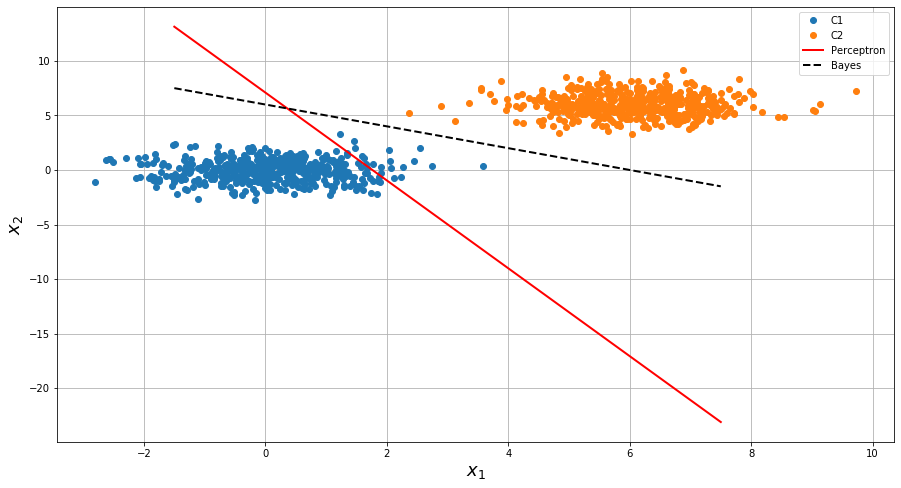

In [5]:
#Selecionando 50 eventos:
events = np.random.randint(0,499,(1,50))
for i in events:
    c1_ev = c1_xTrain[i,:]
    c2_ev = c2_xTrain[i,:]

w_i = np.array([0.3, 0.3, 0.3])
rho = 0.1

w = perceptron(c1_ev, c2_ev, w_i, rho)

x2p = (-w[0]*x1-w[2])/w[1]

#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o perceptron:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2p, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','Perceptron','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()


print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 4

Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador perceptron. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [-1.         -0.87739139  3.18790698]


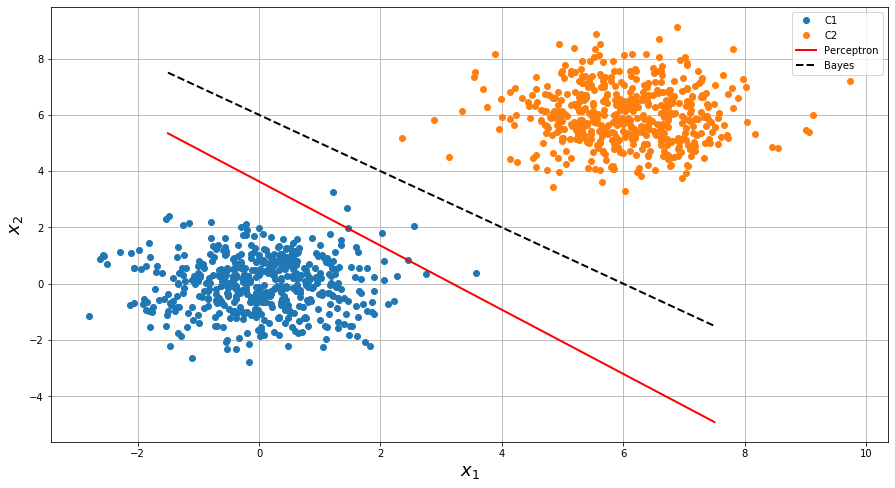

In [6]:
#Selecionando 50 eventos:
events = np.random.randint(0,499,(1,50))
for i in events:
    c1_ev = c1_xTrain[i,:]
    c2_ev = c2_xTrain[i,:]

w_i = np.array([0.3, 0.3, 0.3])
rho = 0.1

w = perceptron(c1_ev, c2_ev, w_i, rho)

x2p = (-w[0]*x1-w[2])/w[1]

#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o perceptron:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2p, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','Perceptron','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()


print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 5

Projete o classificador baseado na minimização do erro ao quadrado (algoritmo da pseudo-inversa), utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [[-1.        ]
 [-0.95084133]
 [ 5.91846163]]


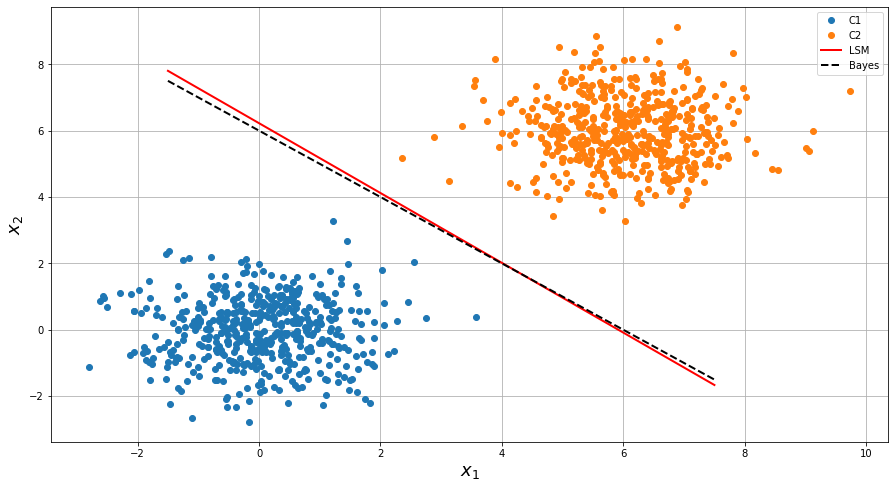

In [7]:
#Implementação do algoritmo da pseudo-inversa:
def mse(c1_tr, c2_tr):
    X = np.append(c1_tr, c2_tr, axis = 0)
    X = np.insert(X,2,1, axis = 1)
    Y = np.append(np.ones([len(c1_tr),1]), -np.ones([len(c2_tr),1]), axis = 0)
    w = np.linalg.inv(X.T @ X) @ (X.T @ Y)
    return w

w = mse(c1_xTrain, c2_xTrain)
x2_mse = (-w[0]*x1-w[2])/w[1]

#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o MSE:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2_mse, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','LSM','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 6

Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador MSE (pseudo-inversa). Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [[-1.        ]
 [-1.02583388]
 [ 6.07870915]]


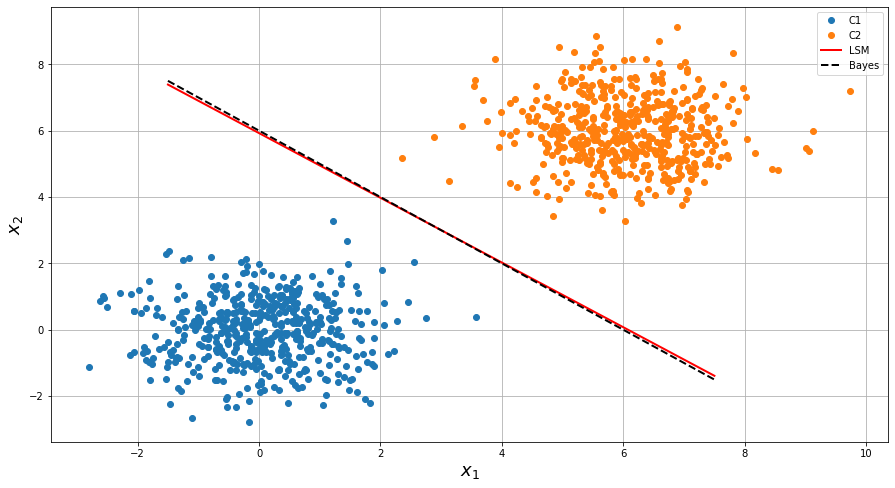

In [8]:
#Selecionando 50 eventos:
events = np.random.randint(0,499,(1,50))
for i in events:
    c1_ev = c1_xTrain[i,:]
    c2_ev = c2_xTrain[i,:]

w = mse(c1_ev, c2_ev)
x2_mse = (-w[0]*x1-w[2])/w[1]

#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o MSE:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2_mse, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','LSM','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 7

Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador MSE (pseudo-inversa). Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [[-1.        ]
 [-0.81280996]
 [ 5.38950115]]


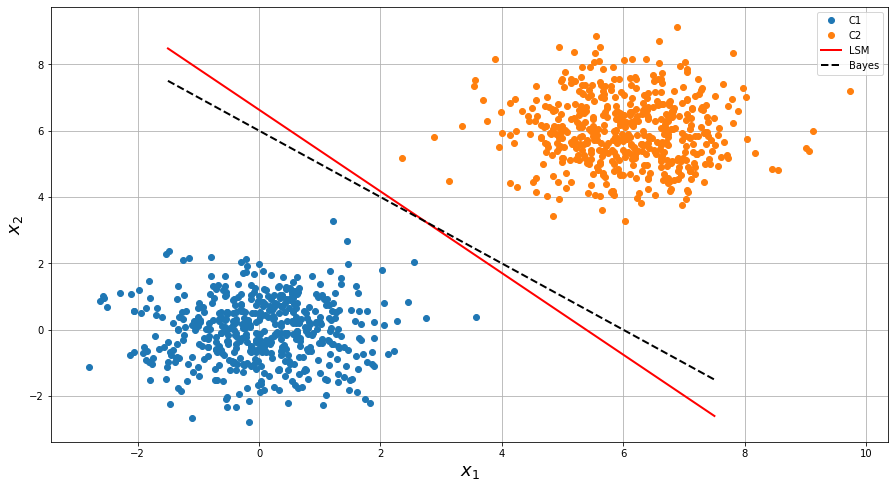

In [9]:
#Selecionando 50 eventos:
events = np.random.randint(0,499,(1,50))
for i in events:
    c1_ev = c1_xTrain[i,:]
    c2_ev = c2_xTrain[i,:]

w = mse(c1_ev, c2_ev)
x2_mse = (-w[0]*x1-w[2])/w[1]

#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o MSE:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2_mse, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','LSM','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 8

Projete o classificador SVM linear com margem rígida, utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [-1.         -1.21148946  6.77204499]


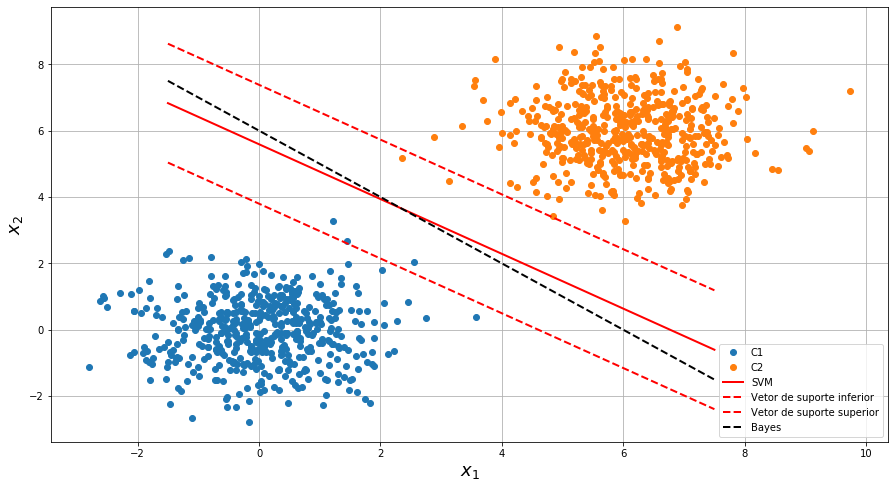

In [10]:
from sklearn.svm import SVC

#Implementação do classificador SVM linear:
def SVM_linear(c1_tr, c2_tr, C):
    clf = SVC(C, kernel = 'linear')
    X = np.append(c1_tr, c2_tr, axis = 0)
    Y = np.append(np.ones([len(c1_tr),1]), -np.ones([len(c2_tr),1]), axis = 0)
    clf.fit(X, np.ravel(Y))
    w = np.append(clf.coef_,clf.intercept_)
    sv1 = clf.support_vectors_[0]  
    sv2 = clf.support_vectors_[-1]
    return clf, w, sv1, sv2


C = 1e6   #Margem rígida
clf, w, sv1, sv2 = SVM_linear(c1_xTrain, c2_xTrain, C)

#Hiperplano de decisão:
x2_svm = ((-w[0]/w[1]) * x1) - (w[2] / w[1])

#Vetores de suporte:
sv_inf = (-w[0]/w[1]) * x1 + (sv1[1] - (-w[0]/w[1]) * sv1[0])
sv_sup = (-w[0]/w[1]) * x1 + (sv2[1] - (-w[0]/w[1]) * sv2[0])

#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o SVM:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2_svm, 'r',linewidth=2)
plt.plot(x1, sv_inf, '--r',linewidth=2)
plt.plot(x1, sv_sup, '--r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','SVM', 'Vetor de suporte inferior', 'Vetor de suporte superior','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 9

Projete o classificador SVM linear com margem suave, utilizando o conjunto de treinamento. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [-1.         -1.21148946  6.77204499]


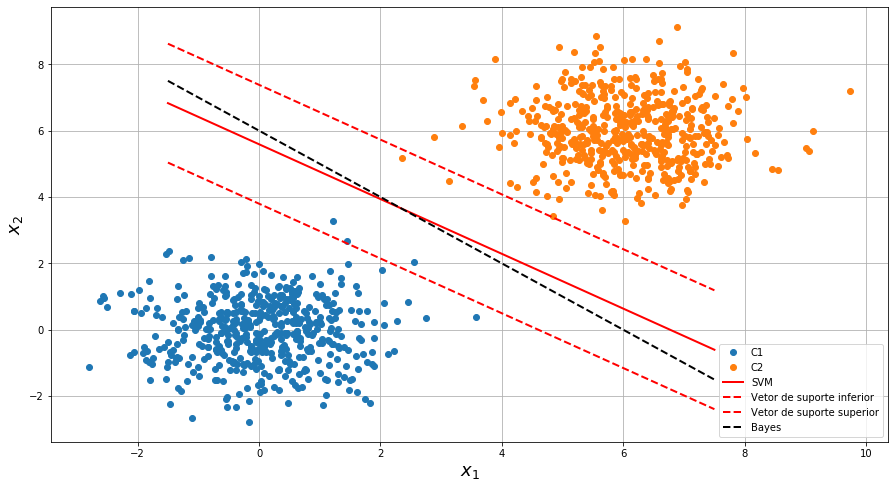

In [11]:
C = 10   #Margem suave
clf, w, sv1, sv2 = SVM_linear(c1_xTrain, c2_xTrain, C)

#Hiperplano de decisão:
x2_svm = ((-w[0]/w[1]) * x1) - (w[2] / w[1])

#Vetores de suporte:
sv_inf = (-w[0]/w[1]) * x1 + (sv1[1] - (-w[0]/w[1]) * sv1[0])
sv_sup = (-w[0]/w[1]) * x1 + (sv2[1] - (-w[0]/w[1]) * sv2[0])


#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o SVM:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2_svm, 'r',linewidth=2)
plt.plot(x1, sv_inf, '--r',linewidth=2)
plt.plot(x1, sv_sup, '--r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','SVM', 'Vetor de suporte inferior', 'Vetor de suporte superior','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 10

Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador SVM linear com margem rígida. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [-1.         -1.27596633  6.65097478]


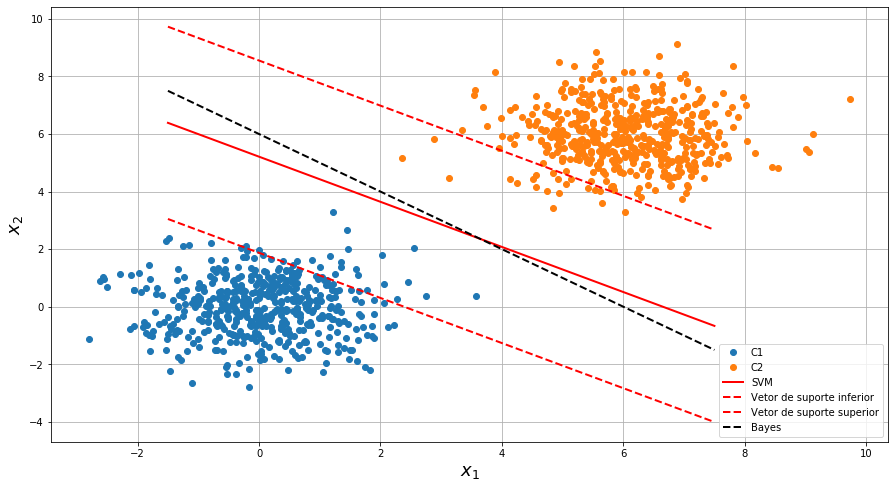

In [12]:
#Selecionando 50 eventos:
events = np.random.randint(0,499,(1,50))
for i in events:
    c1_ev = c1_xTrain[i,:]
    c2_ev = c2_xTrain[i,:]

C = 1e6   #Margem rígida
clf, w, sv1, sv2 = SVM_linear(c1_ev, c2_ev, C)

#Hiperplano de decisão:
x2_svm = ((-w[0]/w[1]) * x1) - (w[2] / w[1])

#Vetores de suporte:
sv_inf = (-w[0]/w[1]) * x1 + (sv1[1] - (-w[0]/w[1]) * sv1[0])
sv_sup = (-w[0]/w[1]) * x1 + (sv2[1] - (-w[0]/w[1]) * sv2[0])


#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o SVM:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2_svm, 'r',linewidth=2)
plt.plot(x1, sv_inf, '--r',linewidth=2)
plt.plot(x1, sv_sup, '--r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','SVM', 'Vetor de suporte inferior', 'Vetor de suporte superior','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])

## Questão 11

Utilizando agora outros 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador SVM linear com margem suave. Anote o resultado e plote a reta de separação (conjunto de teste), comparando com o classificador de Bayes.

**Solução:**

Coeficientes da reta de separação:  [-1.         -0.87361967  5.91750091]


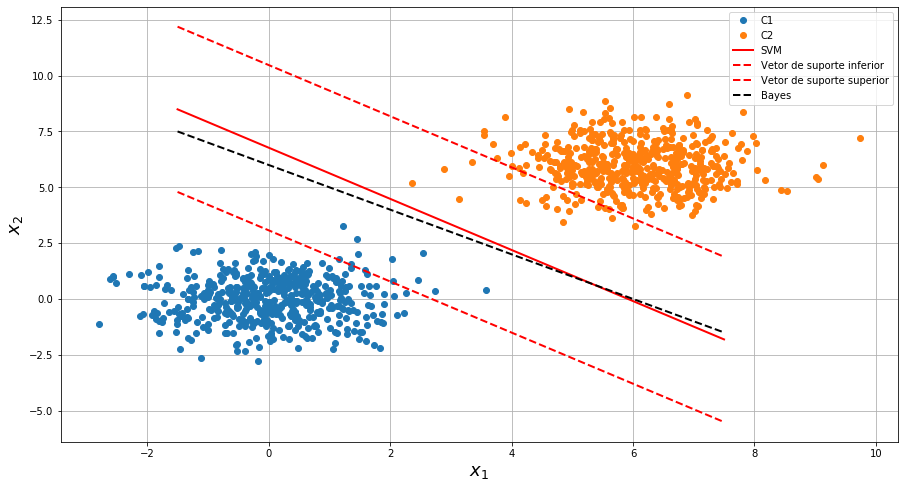

In [13]:
#Selecionando 50 eventos:
events = np.random.randint(0,499,(1,50))
for i in events:
    c1_ev = c1_xTrain[i,:]
    c2_ev = c2_xTrain[i,:]

C = 10   #Margem suave
clf, w, sv1, sv2 = SVM_linear(c1_ev, c2_ev, C)

#Hiperplano de decisão:
x2_svm = ((-w[0]/w[1]) * x1) - (w[2] / w[1])

#Vetores de suporte:
sv_inf = (-w[0]/w[1]) * x1 + (sv1[1] - (-w[0]/w[1]) * sv1[0])
sv_sup = (-w[0]/w[1]) * x1 + (sv2[1] - (-w[0]/w[1]) * sv2[0])


#Plot dos dados de teste juntamente com as superfícies de separação de Bayes e a obtida com o SVM:
plt.figure(figsize = (15,8))
plt.plot(c1_xTest[:,0],c1_xTest[:,1],'o')
plt.plot(c2_xTest[:,0],c2_xTest[:,1],'o')
plt.plot(x1, x2_svm, 'r',linewidth=2)
plt.plot(x1, sv_inf, '--r',linewidth=2)
plt.plot(x1, sv_sup, '--r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','SVM', 'Vetor de suporte inferior', 'Vetor de suporte superior','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficientes da reta de separação: ", -w/w[0])